In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
#
from fuel.datasets import MNIST
from tensorflow.examples.tutorials.mnist import input_data

Using Theano backend.
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
model=Sequential()
model.add(Dense(output_dim=10, input_dim=784, init="glorot_uniform"))
model.add(Activation("softmax"))
# model.compile(losd='categorical_crossentropy', optimizer='sgd')
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x_batch, y_batch = mnist.train.next_batch(25)

In [5]:
model.fit(mnist.train.images, mnist.train.labels, nb_epoch=30, batch_size=128, show_accuracy=True)

Epoch 1/30
55000/55000 [==============================] - 0s - loss: 0.6009 - acc: 0.8449     
Epoch 2/30
55000/55000 [==============================] - 0s - loss: 0.3822 - acc: 0.8952     
Epoch 3/30
55000/55000 [==============================] - 0s - loss: 0.3490 - acc: 0.9033     
Epoch 4/30
55000/55000 [==============================] - 0s - loss: 0.3317 - acc: 0.9068     
Epoch 5/30
55000/55000 [==============================] - 0s - loss: 0.3205 - acc: 0.9106     
Epoch 6/30
55000/55000 [==============================] - 0s - loss: 0.3126 - acc: 0.9129     
Epoch 7/30
55000/55000 [==============================] - 0s - loss: 0.3064 - acc: 0.9145     
Epoch 8/30
55000/55000 [==============================] - 0s - loss: 0.3015 - acc: 0.9161     
Epoch 9/30
55000/55000 [==============================] - 0s - loss: 0.2973 - acc: 0.9172     
Epoch 10/30
55000/55000 [==============================] - 0s - loss: 0.2939 - acc: 0.9185     
Epoch 11/30
55000/55000 [========================

In [6]:
objective_score = model.evaluate(mnist.test.images,mnist.test.labels, batch_size=128)
print objective_score

10000/10000 [==============================] - 0s     
0.270239103019


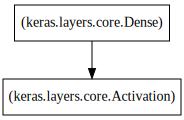

In [7]:
from IPython.display import SVG
from keras.utils.visualize_util import to_graph
SVG(to_graph(model).create(prog='dot', format='svg'))

16/16 [==============================] - 0s


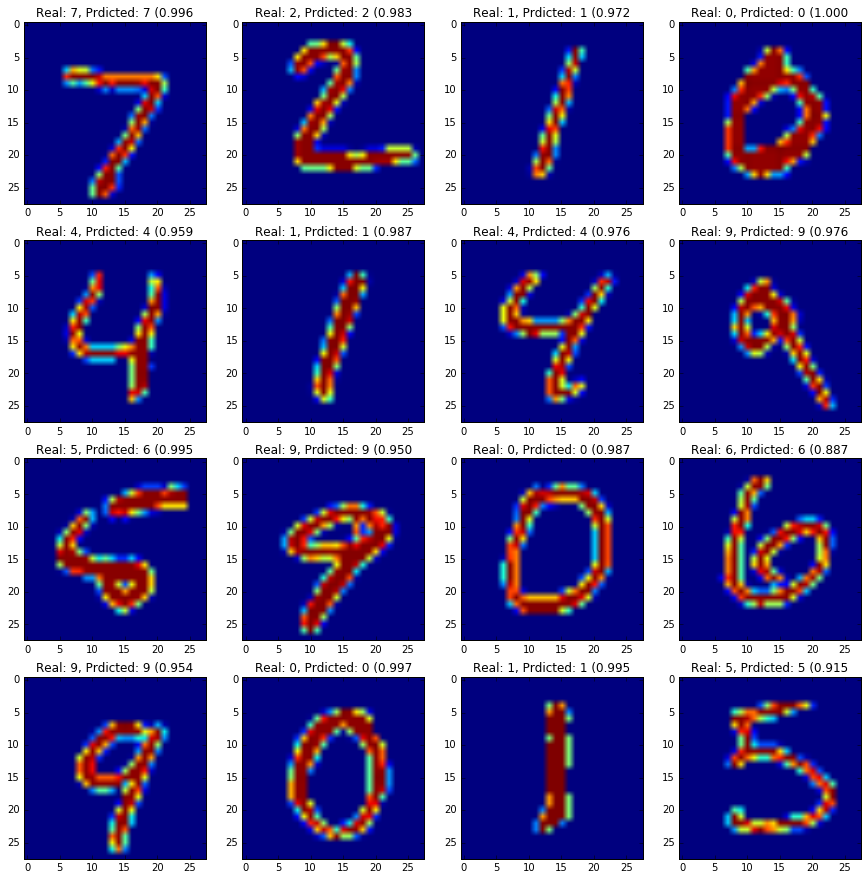

In [8]:
numTest=16
numXY=np.sqrt(numTest).astype(np.int)

x_test_data=mnist.test.images[:numTest,:]

ret_classes=model.predict_classes(x_test_data)
ret_proba=model.predict_proba(mnist.test.images[:numTest,:])
ret_true=np.argmax(mnist.test.labels[:numTest], axis=1)
plt.figure(figsize=(15,15))
for xx in xrange(numXY):
    for yy in xrange(numXY):
        tpos=xx*numXY + yy
        plt.subplot(numXY,numXY,tpos+1)
        plt.imshow(x_test_data[tpos].reshape((28,28)))
        plt.title('Real: %d, Prdicted: %d (%0.3f' % (ret_true[tpos], ret_classes[tpos], np.max(ret_proba[tpos])) )

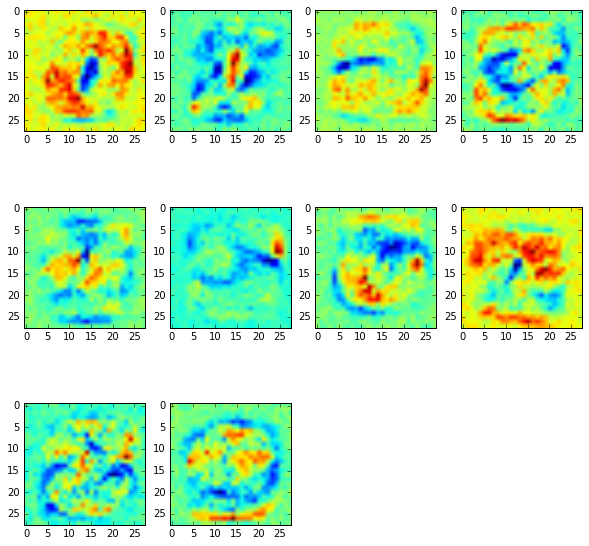

In [73]:
model_Weights=model.get_weights()[0]
numx=4
numW=10
numy=numW/numx
if numx*numy<numW:
    numy+=1
plt.figure(figsize=(10,10))
# plt.figtext('Weights')
for xx in xrange(numx):
    for yy in xrange(numy):
        pos=yy*numx+xx
        if pos<numW:
            plt.subplot(numy,numx,pos+1)
            plt.imshow(model_Weights[:,pos].reshape(28,28))